In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad, Compose
from torchvision.utils import make_grid
from core.utils.CNN_scorers import resize_and_pad_tsr

In [3]:
# load metadata 
data_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"
metadata_df_cross_layer = pd.read_hdf(os.path.join(data_path, "metadata_cross_layer_recording_df.h5"), key="metadata_df")
save_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results"

In [4]:
metadata_df_cross_layer.head()

,output_type,trget_imge_name,similarity_metric,pop_size,pop_resampling_id,gan_name,layer_name,layer_short,net_name,img_size,pading_size,input_size,score,pop_unit_idx,sub_pop_type,gen_rerun_id,data_root
1688040785_3555784,target_img,imagenet_18,None,128,0,fc6,"[.features.Conv2d10, .features.Conv2d6]",conv53,alexnet,None,"(40, 40)","(3, 227, 227)",NaN,"{'.features.Conv2d10': [10731, 3802, 1943, 103...",most,None,N:\PonceLab\Users\Alireza\insilico_experiments...
1688040785_4721681,target_img_RF_masked,imagenet_18,None,128,0,fc6,"[.features.Conv2d10, .features.Conv2d6]",conv53,alexnet,None,"(40, 40)","(3, 227, 227)",NaN,"{'.features.Conv2d10': [10731, 3802, 1943, 103...",most,None,N:\PonceLab\Users\Alireza\insilico_experiments...
1688040804_8347496,generation_data,imagenet_18,cosine,128,0,fc6,"[.features.Conv2d10, .features.Conv2d6]",conv53,alexnet,None,"(40, 40)","(3, 227, 227)",0.844262,"{'.features.Conv2d10': [10731, 3802, 1943, 103...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...
1688040804_2198929,best_gen_imgs,imagenet_18,cosine,128,0,fc6,"[.features.Conv2d10, .features.Conv2d6]",conv53,alexnet,None,"(40, 40)","(3, 227, 227)",0.844262,"{'.features.Conv2d10': [10731, 3802, 1943, 103...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...
1688040804_5064460,best_gen_imgs_RF_masked,imagenet_18,cosine,128,0,fc6,"[.features.Conv2d10, .features.Conv2d6]",conv53,alexnet,None,"(40, 40)","(3, 227, 227)",0.844262,"{'.features.Conv2d10': [10731, 3802, 1943, 103...",most,0,N:\PonceLab\Users\Alireza\insilico_experiments...


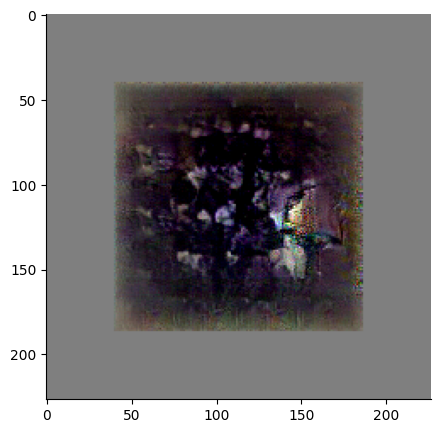

In [5]:
# get the inital image 
from torchvision.utils import make_grid
from core.utils.GAN_utils import upconvGAN
gan_name = "fc6"
G = upconvGAN(gan_name).cuda()
init_code = np.zeros((1, G.codelen))
imgs = G.visualize_batch_np(init_code)
# shoe the imags_grid

#N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\init_img
imtsr = resize_and_pad_tsr(imgs, (147, 147), (40,40))
imtsr = ToPILImage()(imtsr[0])
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(imtsr)
imtsr.save(os.path.join(r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\init_img", r"init_img.jpg"))

TypeError: not all arguments converted during string formatting

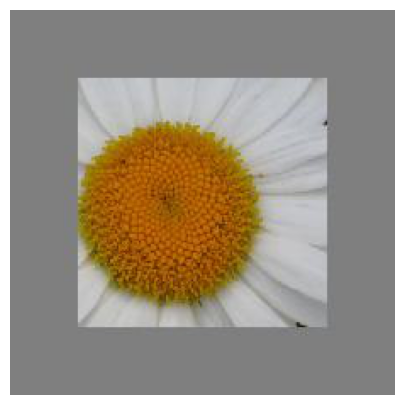

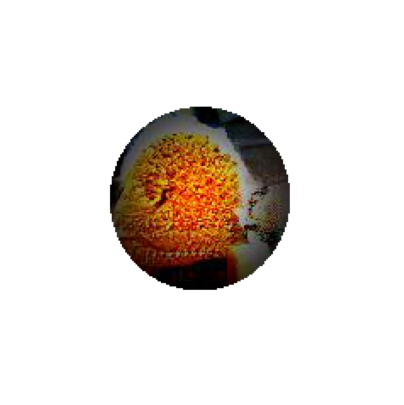

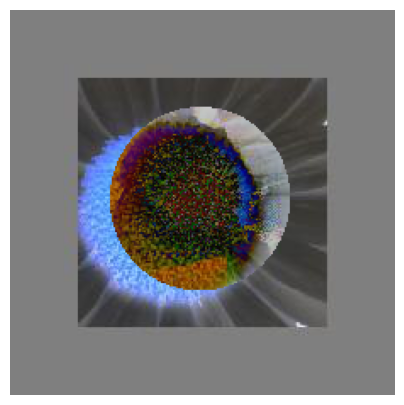

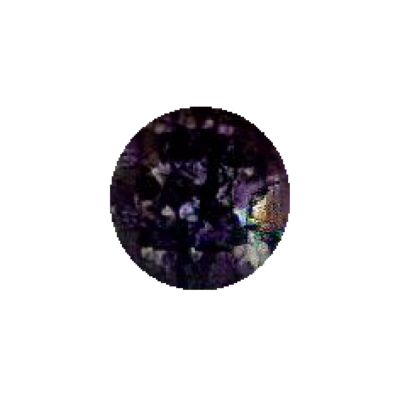

In [21]:

        
image_name = "imagenet_83"
layer_short= "conv53"
similarity_metric = "cosine"
pop_size = 128
gen_rerun_id = 0
output_type = "best_gen_imgs_RF_masked"
RF_treshold = 2
pop_resampling_id = 0
smpling_type = "random"
target_image = load_image_tsr(metadata_df_cross_layer, trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
                                    layer_short=layer_short, output_type="target_img", pop_size=pop_size, sub_pop_type=smpling_type)
reconstracted_image = load_image_tsr(metadata_df_cross_layer, trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
                                    layer_short=layer_short, output_type="best_gen_imgs_RF_masked", pop_size=pop_size, sub_pop_type=smpling_type, gen_rerun_id=gen_rerun_id)
# load the RF mask
output_type =  "generation_data"
#RF_map = load_npz(metadata_df_cross_layer, filename="RF_mask",trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
#                                    layer_short=layer_short, output_type=output_type, pop_size=pop_size, sub_pop_type=smpling_type, gen_rerun_id=gen_rerun_id)
RF_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\rf_filters"
RF_map = np.load(os.path.join(RF_path, f"conv4_{pop_size}.npz"))

#rf_filter = np.load(os.path.join(data_path, "rf_filters", f"{layer_short_list[0]}_{pop_size_list[-1]}.npz"))
RF_filter = RF_map["fitmap"] > RF_map["fitmap"][int(RF_map["xo"]+(1.5*RF_map["sigma_x"])), int(RF_map["yo"]+(1.5*RF_map["sigma_y"]))]
# get not RF mask
#target_image[:, np.logical_not(RF_filter)] = 1
reconstracted_image[:, np.logical_not(RF_filter)] = 1
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(ToPILImage()(target_image))
ax.axis("off")
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(ToPILImage()(reconstracted_image))
ax.axis("off")


delta = np.abs(target_image - reconstracted_image)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(ToPILImage()(delta))
ax.axis("off")
init_img_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\init_img\init_img.jpg"
init_img = Image.open(init_img_path)
init_img = ToTensor()(init_img)
init_img[:, np.logical_not(RF_filter)] = 1
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(ToPILImage()(init_img))
ax.axis("off")

# mask the init_img with RF_map
init_img = (torch.from_numpy(np.absolute(RF_map[None,:,:])) / RF_map.max()) * init_img
fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.imshow(ToPILImage()(init_img))
# calculate adhock normalized L2 distance




In [14]:
np.array(RF_filter)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

tensor(10829.9062)
0.04351841285824776


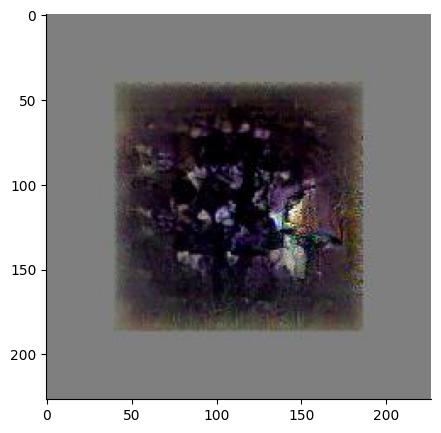

In [5]:
def normalized_pixel_similarity(target_imag, reconstracted_imag, init_img, RFfilter=None):
    epsilon = 1e-5
    delta_rec = (target_imag - reconstracted_imag).abs()
    delta_init = (target_imag - init_img).abs()
    similarity_idx_mat = delta_init - delta_rec 
    if RFfilter is not None:
        similarity_idx_mat[:, np.logical_not(RFfilter)] = 0
        delta_init[:, np.logical_not(RFfilter)] = 0
        num_pixels = np.sum(RFfilter)
    else:
        num_pixels = np.prod(target_imag.shape[1:])
    
    return ((similarity_idx_mat.sum()/num_pixels)/ (delta_init.sum()/num_pixels)).item()

image_name = "imagenet_52"
layer_short= "conv53"
similarity_metric = "cosine"
pop_size = 32
gen_rerun_id = 0
output_type = "best_gen_imgs_RF_masked"
RF_treshold = 2
pop_resampling_id = 0
smpling_type = "random"
target_imag = load_image_tsr(metadata_df_cross_layer, trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
                                    layer_short=layer_short, output_type="target_img", pop_size=pop_size, sub_pop_type=smpling_type)
reconstracted_imag = load_image_tsr(metadata_df_cross_layer, trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
                                    layer_short=layer_short, output_type="best_gen_imgs", pop_size=pop_size, sub_pop_type=smpling_type, gen_rerun_id=gen_rerun_id)
init_img_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\init_img\init_img.jpg"
init_img = Image.open(init_img_path)
init_img = ToTensor()(init_img)
# load the RF mask
output_type =  "generation_data"
#RF_map = load_npz(metadata_df_cross_layer, filename="RF_mask",trget_imge_name=image_name,pop_resampling_id = pop_resampling_id, similarity_metric=similarity_metric,
#                                    layer_short=layer_short, output_type=output_type, pop_size=pop_size, sub_pop_type=smpling_type, gen_rerun_id=gen_rerun_id)
#rf_filter = np.load(os.path.join(data_path, "rf_filters", f"{layer_short_list[0]}_{pop_size_list[-1]}.npz"))
RF_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed\rf_filters"
RF_map = np.load(os.path.join(RF_path, f"conv4_{pop_size}.npz"))

#rf_filter = np.load(os.path.join(data_path, "rf_filters", f"{layer_short_list[0]}_{pop_size_list[-1]}.npz"))
RF_filter = RF_map["fitmap"] > RF_map["fitmap"][int(RF_map["xo"]+(1.5*RF_map["sigma_x"])), int(RF_map["yo"]+(1.5*RF_map["sigma_y"]))]

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(ToPILImage()(init_img))

print(((target_imag - reconstracted_imag)**2).sum())
#print((target_imag - init_img).abs()+1)
print(normalized_pixel_similarity(target_imag, reconstracted_imag, init_img, RFfilter=np.array(RF_filter)))
#print(normalized_L2_distance(target_image, reconstracted_image, init_img, RFfilter=RF_filter))

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define your custom dataset by subclassing torch.utils.data.Dataset
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Return an item from the dataset based on the given index
        return self.data[idx]

# Create an instance of your dataset
data = [1, 2, 3, 4, 5]
dataset = MyDataset(data)

# Specify the number of workers (processes) for parallel loading
num_workers = 2

# Create a data loader that loads data in parallel using torch.utils.data.DataLoader
dataloader = DataLoader(dataset, batch_size=2, num_workers=num_workers)

dataloader.__getitem__(1)

AttributeError: 'DataLoader' object has no attribute 'files'

In [16]:
from inSilico_experiments.utils.CosineDataset import *
from torch.utils.data import DataLoader

image_name = "imagenet_83"
layer_short= "conv53"
similarity_metric = "cosine"
pop_size = 32
gen_rerun_id = 0
output_type = "best_gen_imgs_RF_masked"
RF_treshold = 2
pop_resampling_id = 0
smpling_type = "random"
sub_meta_df = metadata_df_cross_layer[\
                (metadata_df_cross_layer["output_type"] == "best_gen_imgs_RF_masked") & (
                metadata_df_cross_layer["layer_short"]==layer_short) & (
                metadata_df_cross_layer["sub_pop_type"] == smpling_type) & (
                metadata_df_cross_layer["similarity_metric"] == similarity_metric) & ( 
                metadata_df_cross_layer["trget_imge_name"] == image_name)]
path_list = [os.path.join(sub_meta_df["data_root"][i], f"{sub_meta_df.index[i]}.jpg") for i in range(len(sub_meta_df))]
label_list = sub_meta_df.index.values

transform = Compose([
    ToTensor()
])

dataset = SimpleDataset(path_list, label_list, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, num_workers=5)

for i, data in enumerate(dataloader):
    print(i, data[1])


0 ('1688049170_3351324', '1688049190_6208311', '1688049209_6890436', '1688049228_7716757', '1688049247_7889676', '1688049270_9328985', '1688049289_9610366', '1688049307_8281430', '1688049326_5576381', '1688049345_4067958')
1 ('1688049366_1481385', '1688049385_9544307', '1688049404_5681966', '1688049423_6832256', '1688049442_1797670', '1688049463_1584479', '1688049481_5960863', '1688049500_7014097', '1688049519_8849008', '1688049539_4926908')
2 ('1688049563_3136280', '1688049582_4662263', '1688049603_7665616', '1688049622_8380677', '1688049641_3209721', '1688027323_3351324', '1688027343_6208311', '1688027365_6890436', '1688027386_7716757', '1688027407_7889676')
3 ('1688027430_9328985', '1688027452_9610366', '1688027474_8281430', '1688027496_5576381', '1688027518_4067958', '1688027541_1481385', '1688027561_9544307', '1688027581_5681966', '1688027601_6832256', '1688027620_1797670')
4 ('1688027641_1584479', '1688027660_5960863', '1688027679_7014097', '1688027699_8849008', '1688027719_49269

In [2]:

import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *
from core.utils.GAN_utils import loadBigGAN, BigGAN_wrapper
from pytorch_pretrained_biggan import truncated_noise_sample
#%%

BGAN = loadBigGAN()
G = BigGAN_wrapper(BGAN)
code_length = 256
fixnoise = 0.7 * truncated_noise_sample(1, 128, seed=1)
init_code = np.concatenate((fixnoise, np.zeros((1, 128))), axis=1)
imgs = G.visualize_batch_np(init_code) 
imtsr = resize_and_pad_tsr(imgs, (147, 147), (40,40))
imtsr = ToPILImage()(imtsr[0])
imtsr.save(os.path.join(r"/n/scratch3/users/a/ala2226/BigGAN_reconstruction_O2_080123", r"init_img.jpg"))
#imtsr.save(os.path.join(r"N:\PonceLab\Users\Alireza\insilico_experiments\BigGAN_expriment\post_process\init_image",  r"init_img.jpg"))

In [12]:
import torch
import numpy as np
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
import matplotlib.pyplot as plt
from inSilico_experiments.utils.func_lib import *

# Specify the dimensions of the image (height, width, channels)
height = 227
width = 227
channels = 3
for i in range(100):
# Generate random white noise tensor
    white_noise_tensor = torch.randint(0, 256, (channels, height, width), dtype=torch.uint8)
    imtsr = resize_and_pad_tsr(white_noise_tensor, (147, 147), (40,40))
    # Transpose the tensor to match the order expected by matplotlib (H, W, C)
    imtsr = ToPILImage()(imtsr[0])
    #fig, ax = plt.subplots(figsize=(5, 5))
    #ax.imshow(imtsr)
    imtsr.save(os.path.join(r"N:\PonceLab\Users\Alireza\insilico_experiments\BigGAN_expriment_processed_data_and_results\init_image", rf"init_img_{i}.jpg"))

In [8]:
white_noise_tensor.shape


torch.Size([1, 3, 227, 227])